In [1]:
import pandas as pd
import numpy as np

# Retry loading the data_0set
data_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_NWIN_CLND_BLNCD_2.csv")

# Check the columns and first few rows of the data_0
data_0_info = data_0.info()
data_0_head = data_0.head()

# Check for empty cells and NaN values
nan_summary = data_0.isna().sum()

data_0_info, data_0_head, nan_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 6960 entries, prov_char to predictions
dtypes: float64(6950), int64(2), object(8)
memory usage: 16.1+ MB


(None,
   prov_char country_char               wavenumber   649.893   650.376  \
 0       SUX           ID  ID-SUX-069-2309-002_005  0.019580  0.020577   
 1       SUX           ID  ID-SUX-074-2311-001_005  0.015026  0.014997   
 2       KTX           ID  ID-KTX-068-2306-002_104  0.007675  0.007844   
 3       SGR           MY  MY-SGR-096-2401-002_NCB  0.007805  0.006585   
 4       SSX           ID  ID-SSX-068-2307-028_202  0.011577  0.012206   
 
     650.858    651.34   651.822   652.304   652.786  ...  3999.158   3999.64  \
 0  0.021276  0.021531  0.021289  0.020601  0.019603  ...  0.000612  0.000631   
 1  0.015173  0.015566  0.016130  0.016762  0.017332  ... -0.000344 -0.000257   
 2  0.008136  0.008477  0.008800  0.009070  0.009293  ...  0.002002  0.002076   
 3  0.005669  0.005116  0.004945  0.005136  0.005631  ...  0.001007  0.001068   
 4  0.012885  0.013565  0.014162  0.014576  0.014721  ...  0.000027  0.000041   
 
    4000.122  tgp_name  dgp_name  fgp_name  country_name  t

In [2]:
data_1 = data_0.copy()

In [3]:
# Delete the specified columns
data_1 = data_0.drop(columns=['thnoth_name_encoded', 'predictions', 'country_char'])

# Rename the column 'wavenumber' to 'sample_code'
data_1 = data_1.rename(columns={'wavenumber': 'sample_code'})

# Display the first few rows of the modified data_1frame
print(data_1.head())

  prov_char              sample_code   649.893   650.376   650.858    651.34  \
0       SUX  ID-SUX-069-2309-002_005  0.019580  0.020577  0.021276  0.021531   
1       SUX  ID-SUX-074-2311-001_005  0.015026  0.014997  0.015173  0.015566   
2       KTX  ID-KTX-068-2306-002_104  0.007675  0.007844  0.008136  0.008477   
3       SGR  MY-SGR-096-2401-002_NCB  0.007805  0.006585  0.005669  0.005116   
4       SSX  ID-SSX-068-2307-028_202  0.011577  0.012206  0.012885  0.013565   

    651.822   652.304   652.786   653.268  ...  3998.194  3998.676  3999.158  \
0  0.021289  0.020601  0.019603  0.018484  ...  0.000519  0.000571  0.000612   
1  0.016130  0.016762  0.017332  0.017710  ... -0.000411 -0.000396 -0.000344   
2  0.008800  0.009070  0.009293  0.009507  ...  0.001873  0.001933  0.002002   
3  0.004945  0.005136  0.005631  0.006331  ...  0.001088  0.001014  0.001007   
4  0.014162  0.014576  0.014721  0.014544  ... -0.000060 -0.000010  0.000027   

    3999.64  4000.122  tgp_name  dgp_n

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Function to remove outliers
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    iso = IsolationForest(contamination=0.05, random_state=42)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned


In [5]:
# Remove outliers from the data
data_1_cleaned = remove_outliers(data_1)

# Separate features and target variables
features = data_1_cleaned.drop(columns=['prov_char', 'sample_code', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
targets_dgp = data_1_cleaned['dgp_name']
targets_tgp = data_1_cleaned['tgp_name']
targets_fgp = data_1_cleaned['fgp_name']
targets_country = data_1_cleaned['country_name']
targets_thnoth = data_1_cleaned['thnoth_name']


In [6]:
# Standardize the features
scaler_1 = StandardScaler()
X_scaled_1 = scaler_1.fit_transform(features)

# Perform PCA_1
pca_1 = PCA(n_components=4)
pca_1_result = pca_1.fit_transform(X_scaled_1)
pca_1_df = pd.DataFrame(data=pca_1_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Add target columns for coloring
pca_1_df['dgp_name'] = targets_dgp
pca_1_df['tgp_name'] = targets_tgp
pca_1_df['fgp_name'] = targets_fgp
pca_1_df['country_name'] = targets_country
pca_1_df['thnoth_name'] = targets_thnoth


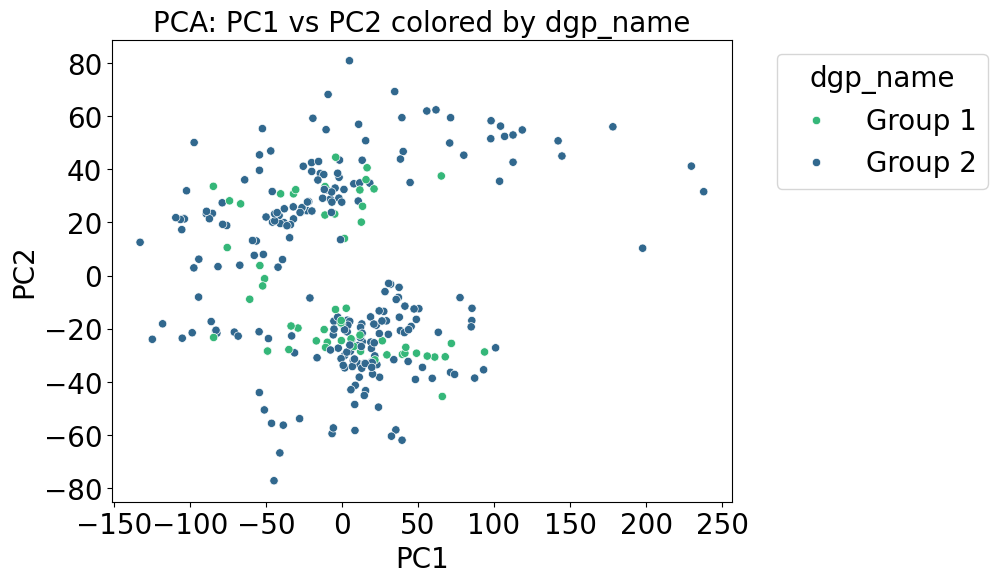

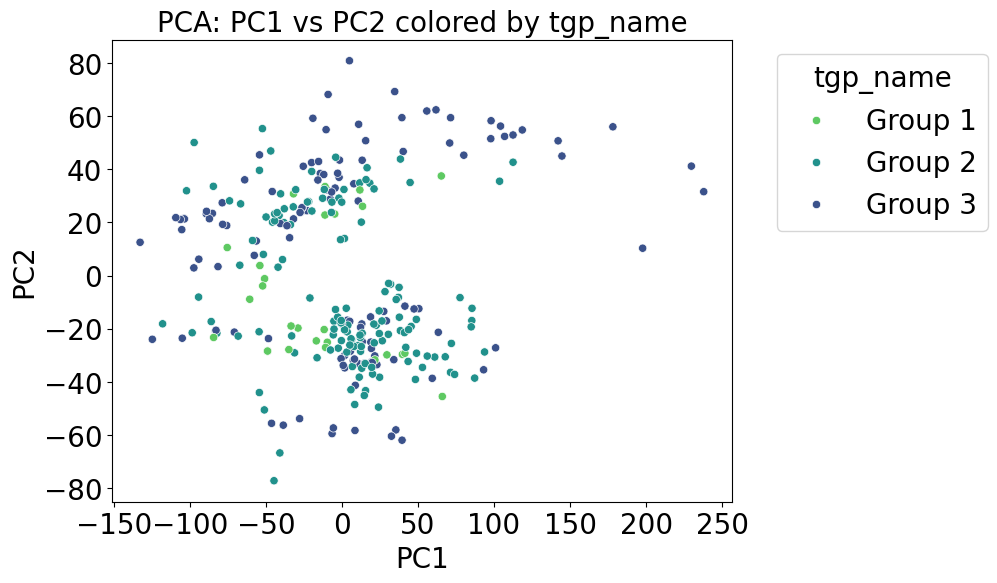

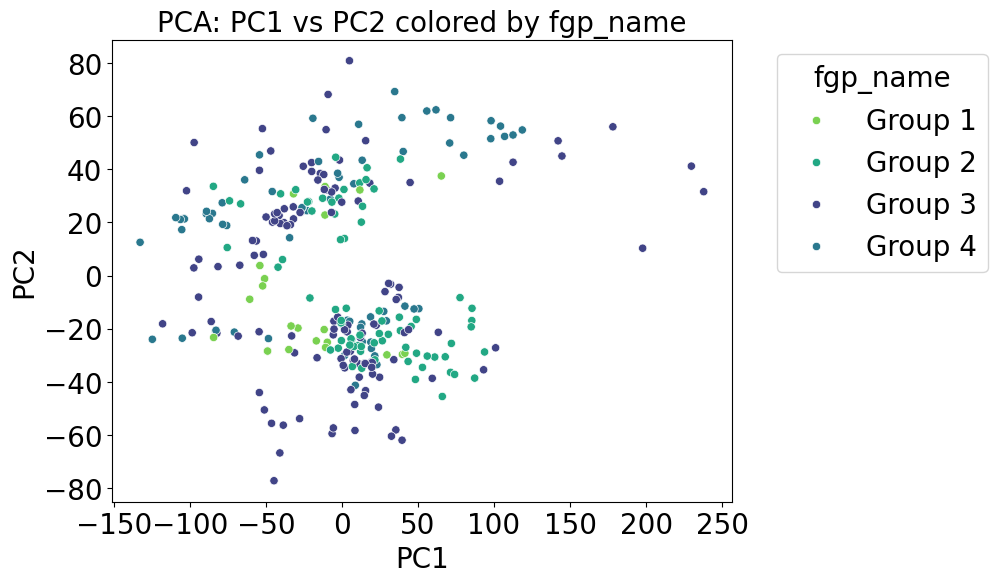

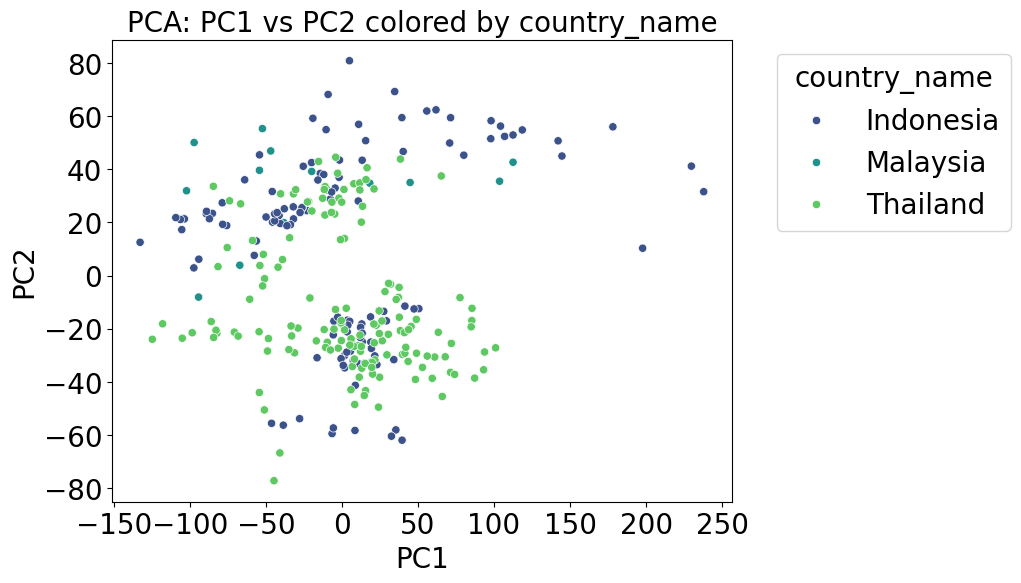

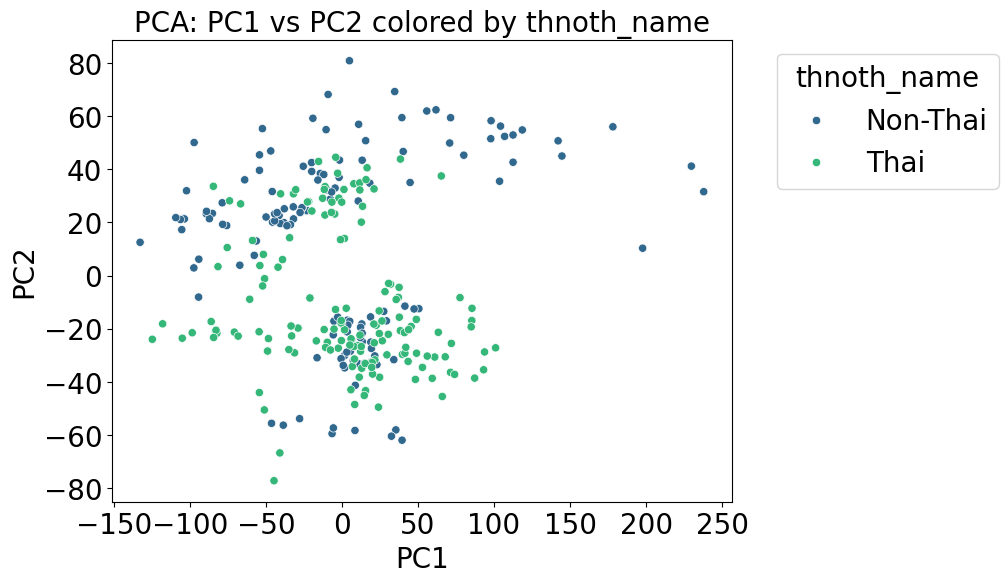

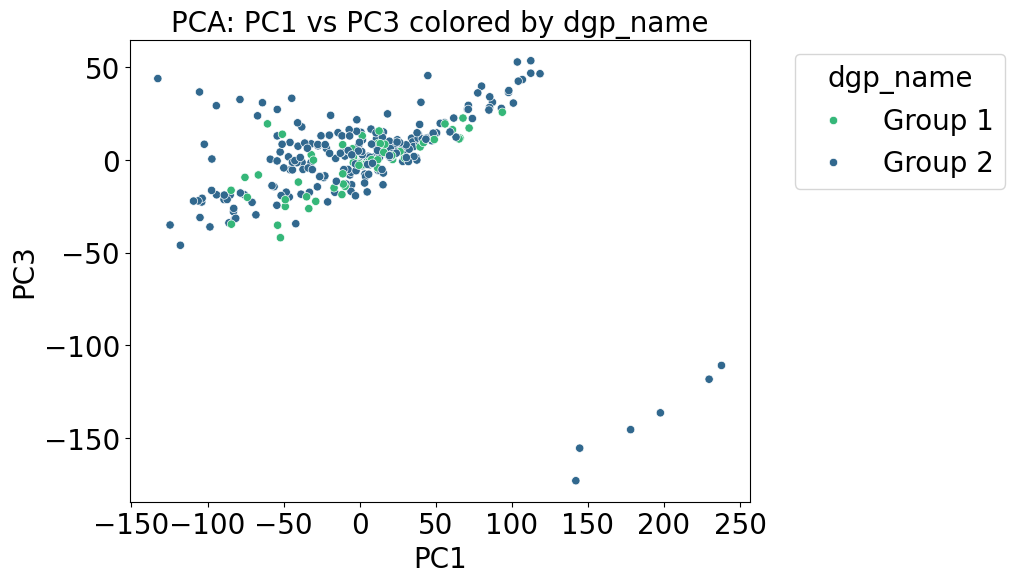

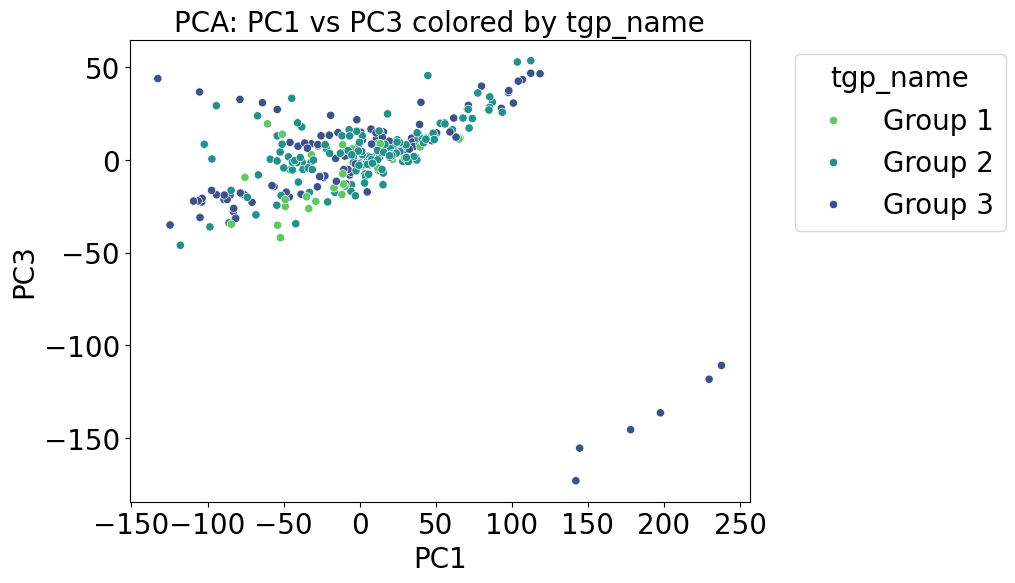

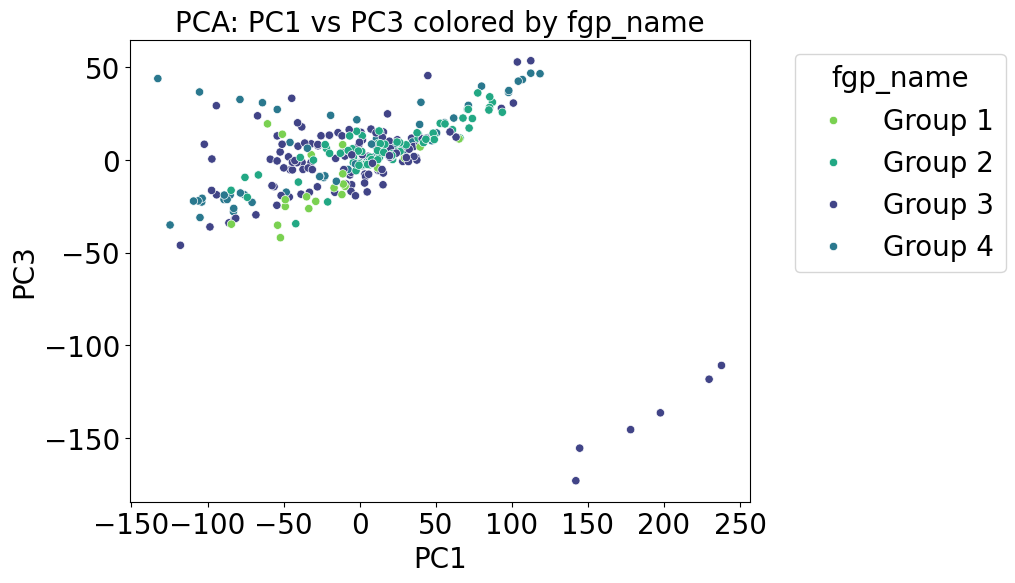

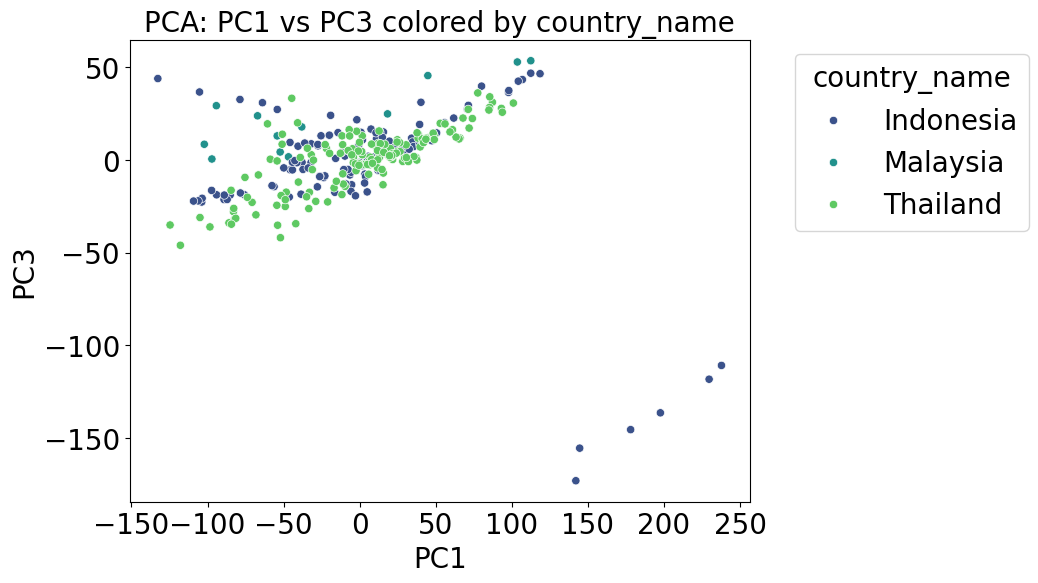

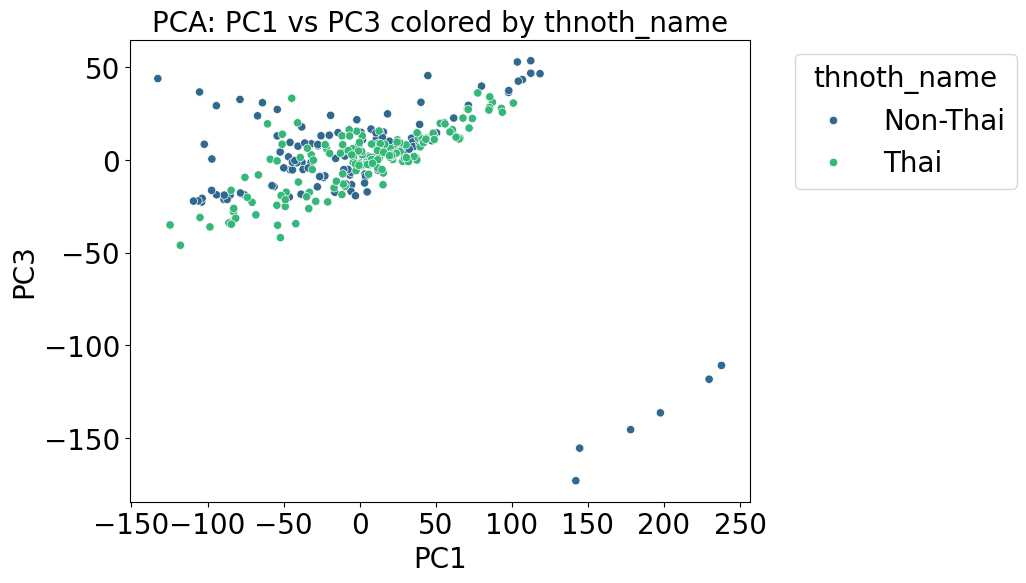

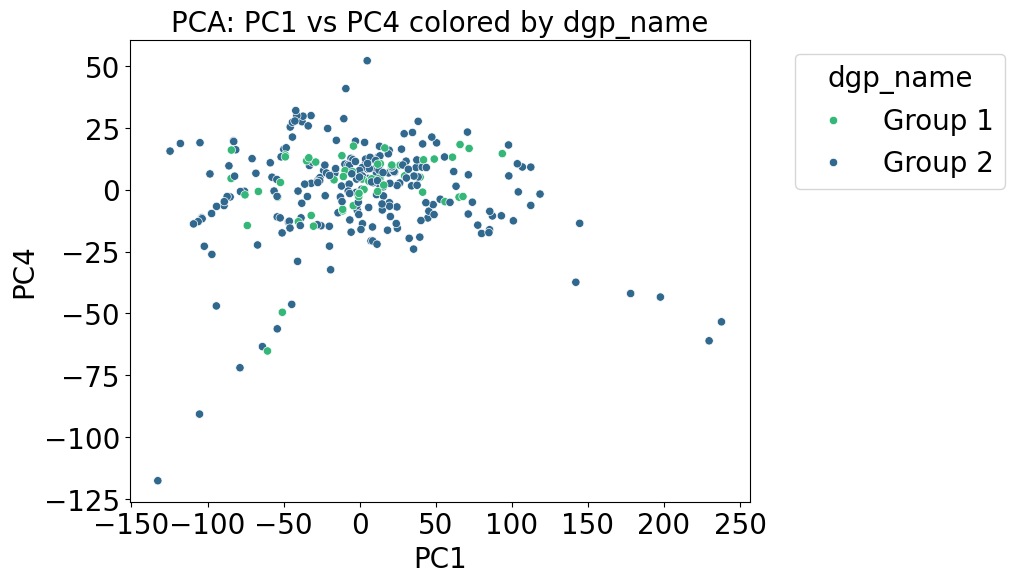

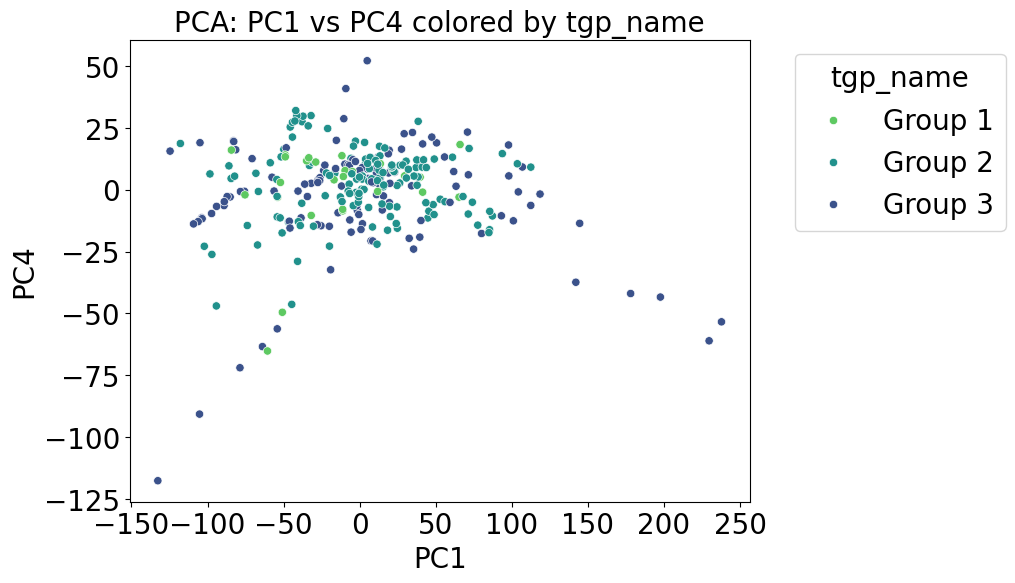

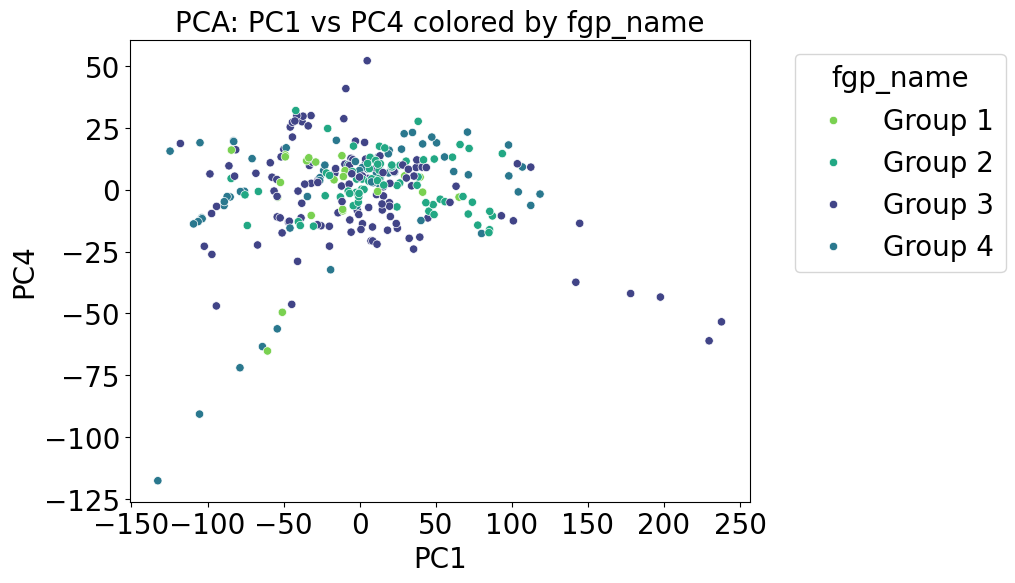

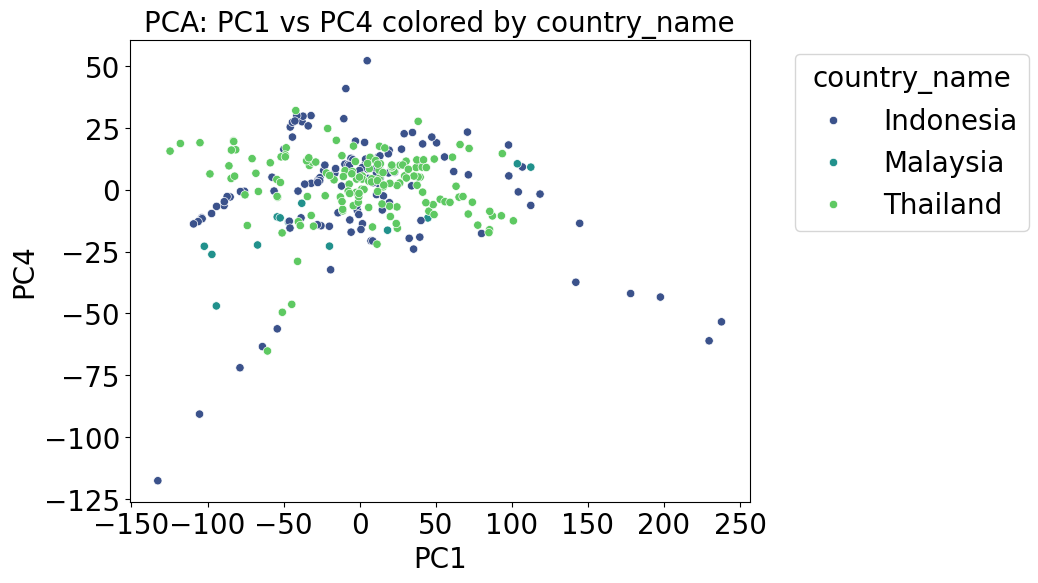

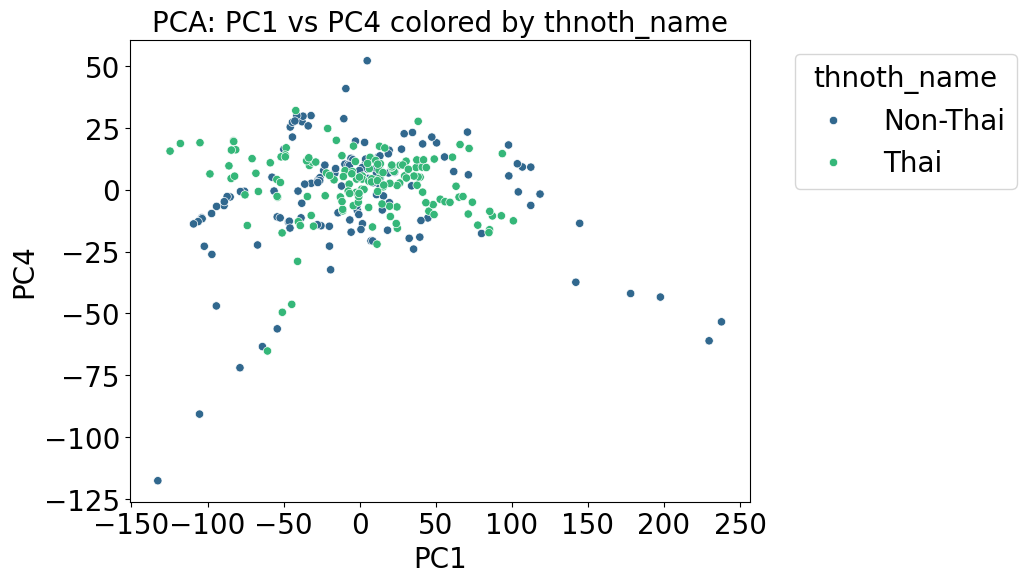

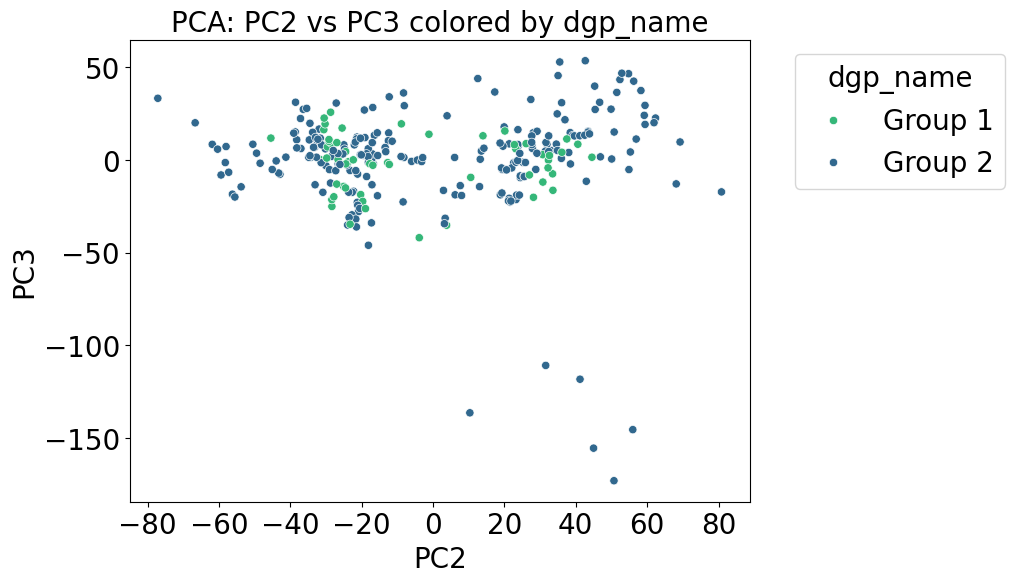

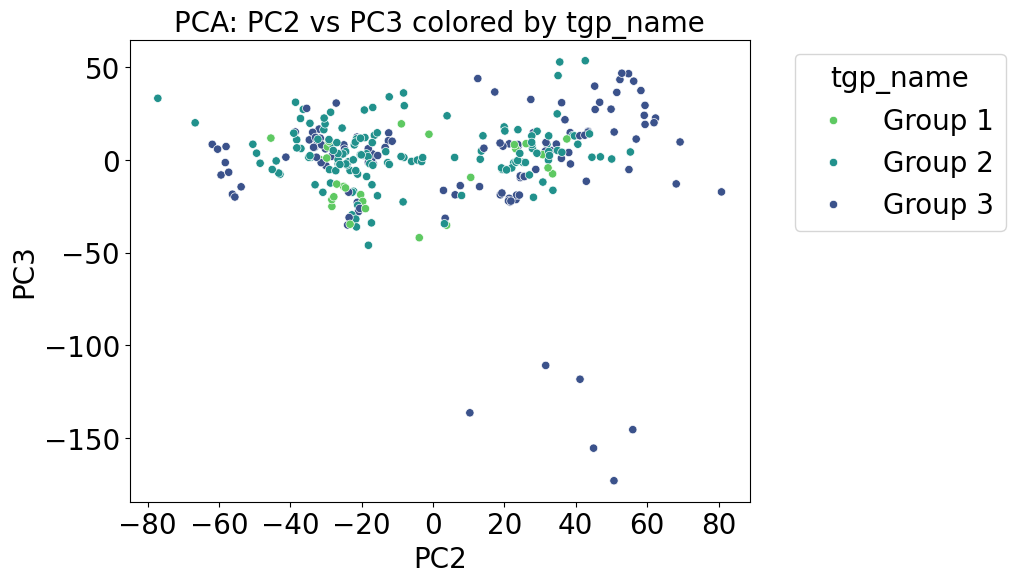

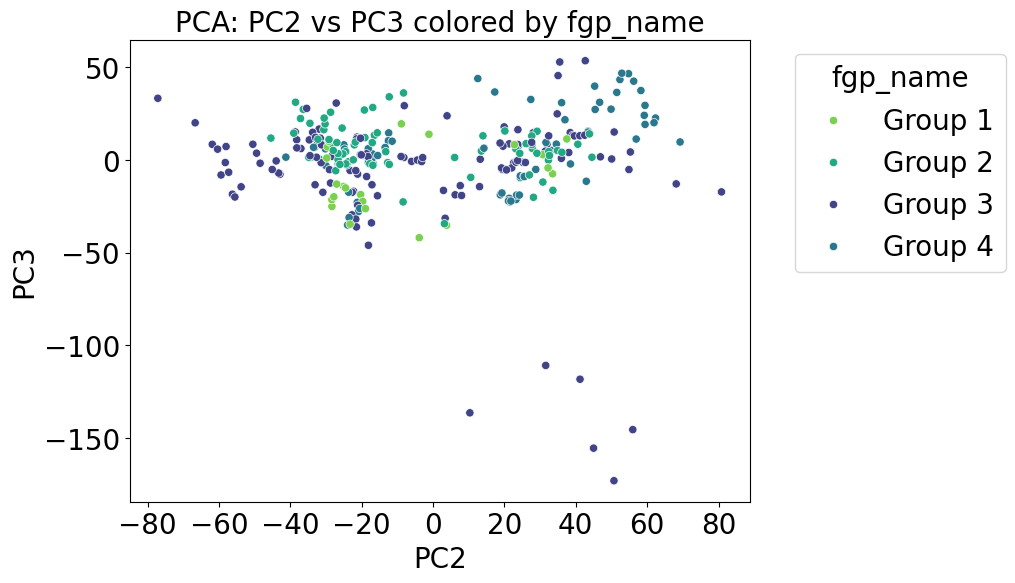

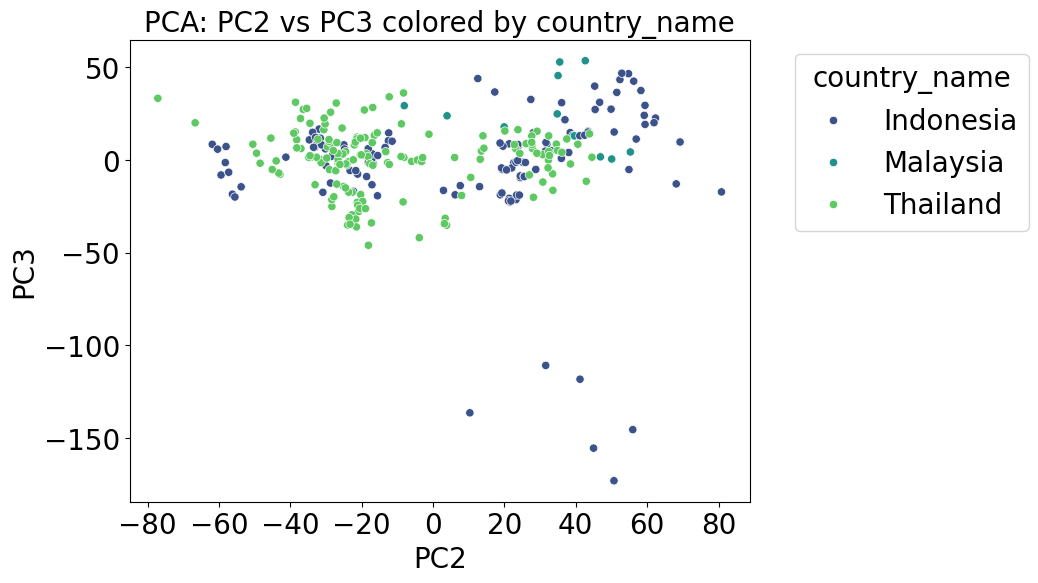

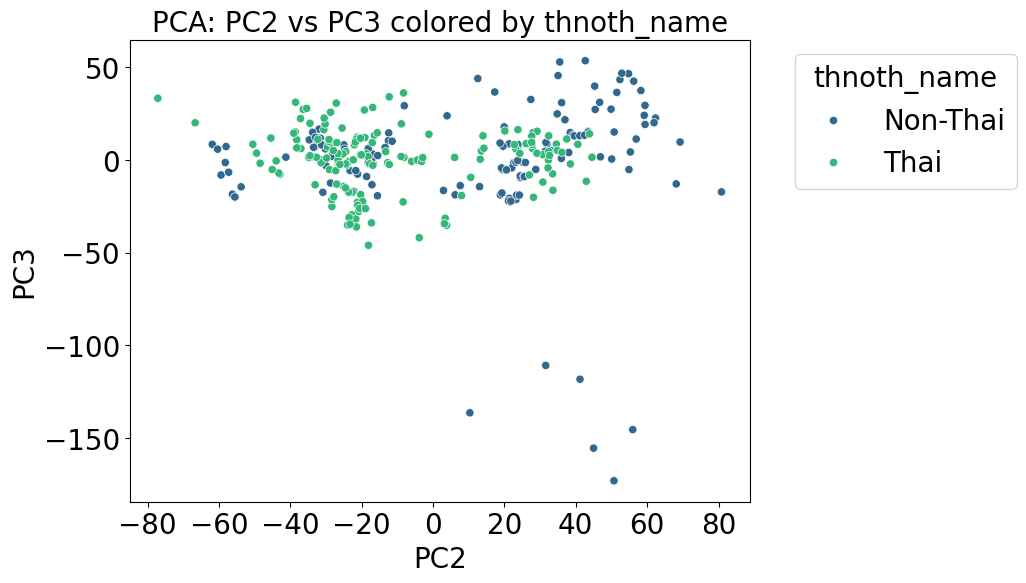

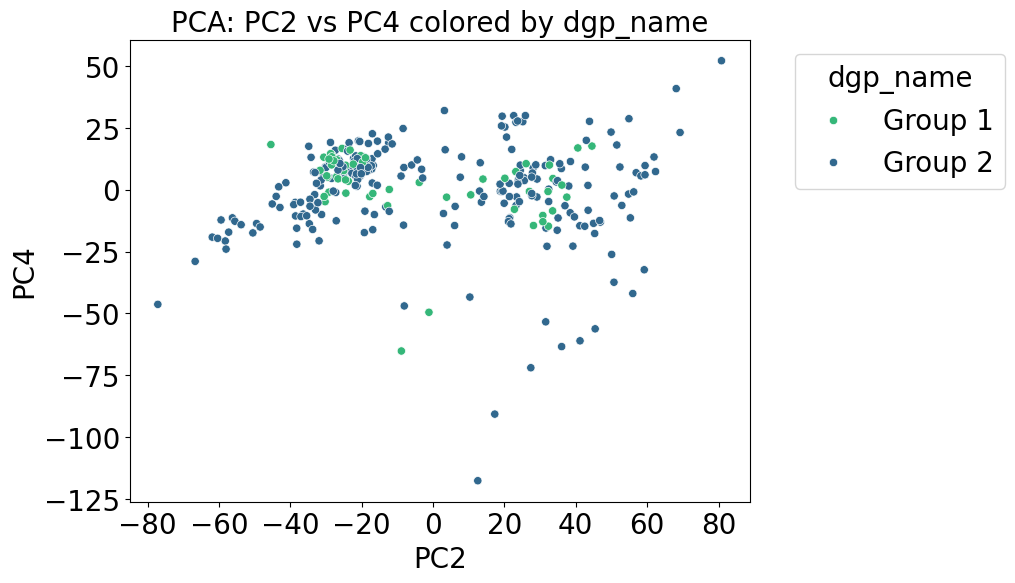

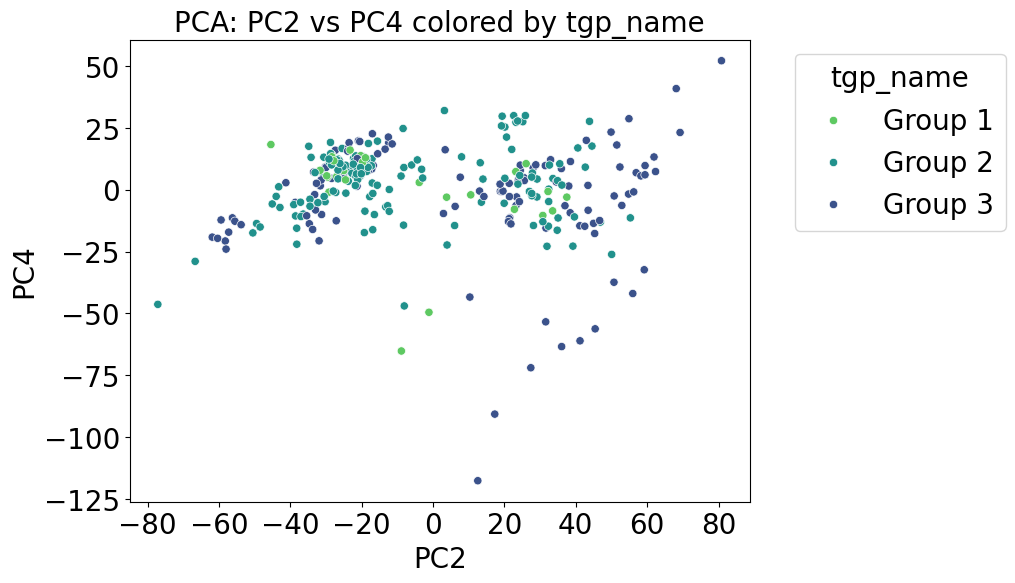

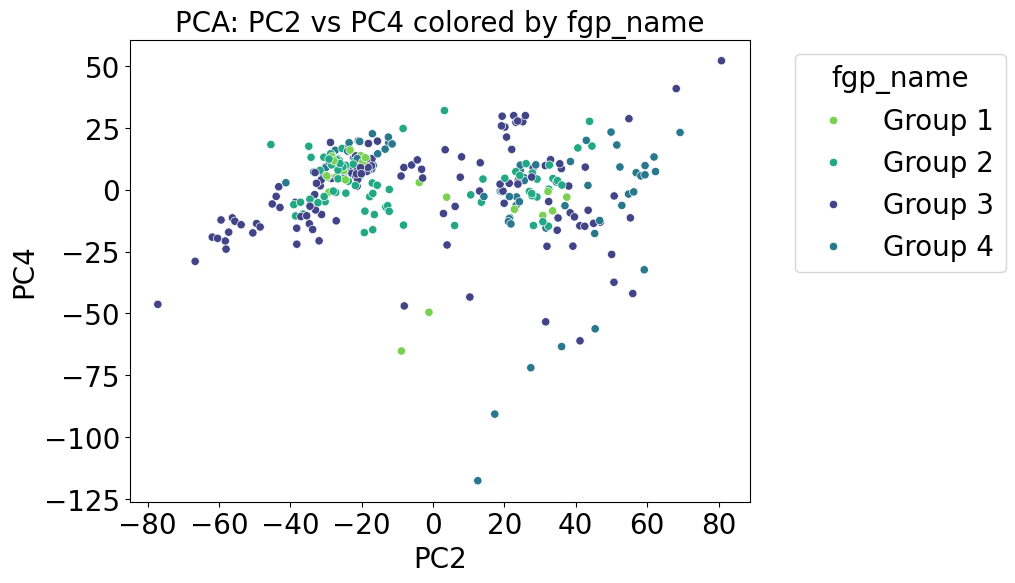

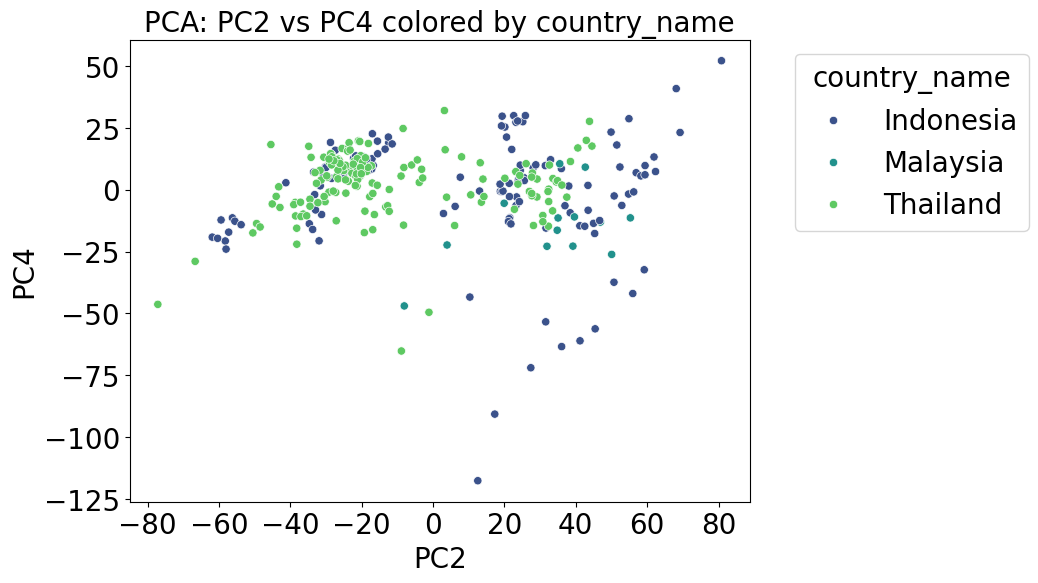

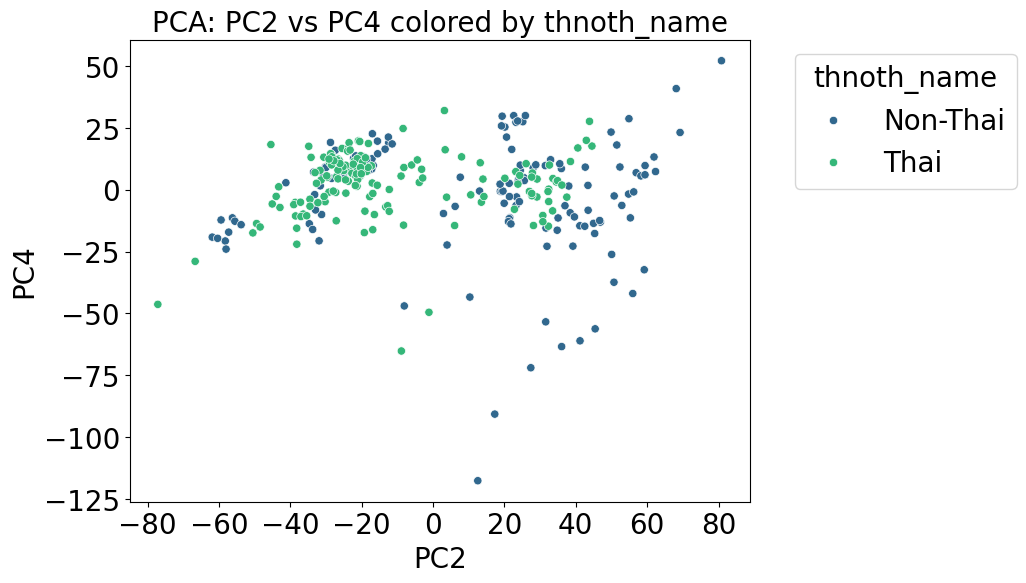

In [22]:
# Plotting function
def plot_pca_1(x, y, color_by):
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(data=pca_1_df, x=x, y=y, hue=color_by, palette='viridis')
    plt.title(f'PCA: {x} vs {y} colored by {color_by}', fontsize=20)
    plt.xlabel(x, fontsize=20)
    plt.ylabel(y, fontsize=20)

    # Set legend in alphabetical order
    handles, labels = scatter.get_legend_handles_labels()
    sorted_labels = sorted(zip(labels, handles), key=lambda t: t[0])
    labels, handles = zip(*sorted_labels)
    plt.legend(handles, labels, title=color_by, bbox_to_anchor=(1.05, 1), fontsize=20, loc='upper left', title_fontsize=20)
    
    # Adjust tick parameters
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.show()

# Plotting the PCA results
plot_pca_1('PC1', 'PC2', 'dgp_name')
plot_pca_1('PC1', 'PC2', 'tgp_name')
plot_pca_1('PC1', 'PC2', 'fgp_name')
plot_pca_1('PC1', 'PC2', 'country_name')
plot_pca_1('PC1', 'PC2', 'thnoth_name')
plot_pca_1('PC1', 'PC3', 'dgp_name')
plot_pca_1('PC1', 'PC3', 'tgp_name')
plot_pca_1('PC1', 'PC3', 'fgp_name')
plot_pca_1('PC1', 'PC3', 'country_name')
plot_pca_1('PC1', 'PC3', 'thnoth_name')
plot_pca_1('PC1', 'PC4', 'dgp_name')
plot_pca_1('PC1', 'PC4', 'tgp_name')
plot_pca_1('PC1', 'PC4', 'fgp_name')
plot_pca_1('PC1', 'PC4', 'country_name')
plot_pca_1('PC1', 'PC4', 'thnoth_name')
plot_pca_1('PC2', 'PC3', 'dgp_name')
plot_pca_1('PC2', 'PC3', 'tgp_name')
plot_pca_1('PC2', 'PC3', 'fgp_name')
plot_pca_1('PC2', 'PC3', 'country_name')
plot_pca_1('PC2', 'PC3', 'thnoth_name')
plot_pca_1('PC2', 'PC4', 'dgp_name')
plot_pca_1('PC2', 'PC4', 'tgp_name')
plot_pca_1('PC2', 'PC4', 'fgp_name')
plot_pca_1('PC2', 'PC4', 'country_name')
plot_pca_1('PC2', 'PC4', 'thnoth_name')


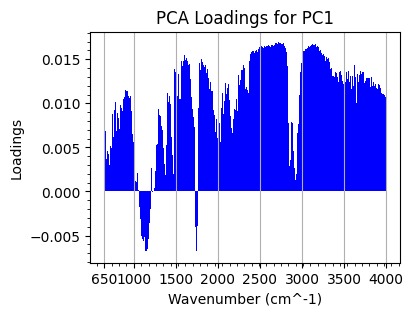

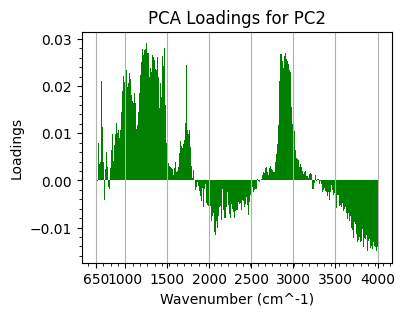

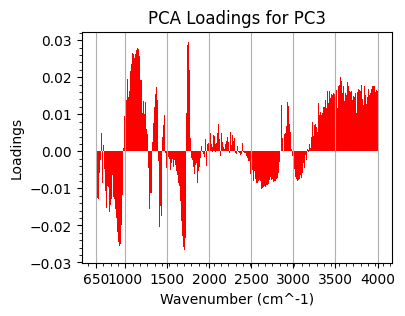

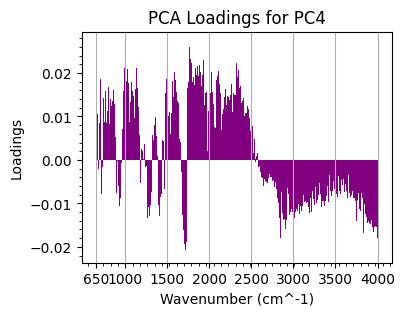

               PC1       PC2       PC3       PC4
649.893   0.004813 -0.002193 -0.008889  0.008726
650.376   0.005249 -0.001673 -0.008475  0.009617
650.858   0.005686 -0.001027 -0.008022  0.010617
651.340   0.006071 -0.000318 -0.007503  0.011608
651.822   0.006337  0.000386 -0.006900  0.012405
...            ...       ...       ...       ...
3998.194  0.010772 -0.014537  0.016235 -0.016621
3998.676  0.010787 -0.014405  0.016130 -0.017008
3999.158  0.010783 -0.014248  0.016109 -0.017373
3999.640  0.010770 -0.014074  0.016174 -0.017669
4000.122  0.010758 -0.013900  0.016320 -0.017857

[6950 rows x 4 columns]


In [8]:
# Get the wavenumbers from the columns
wavenumbers = features.columns.astype(float)
# Get the loadings
loadings_1 = pca_1.components_

# Create a DataFrame for the loadings
loadings_1_df = pd.DataFrame(loadings_1.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=wavenumbers)

# Plot the PCA loadings one by one
def plot_loadings_1(component, color):
    plt.figure(figsize=(4, 3))
    plt.bar(loadings_1_df.index, loadings_1_df[component], color=color)
    plt.title(f'PCA Loadings for {component}')
    plt.xlabel('Wavenumber (cm^-1)')
    plt.ylabel('Loadings')
    plt.xticks(ticks=[4000, 3500, 3000, 2500, 2000, 1500, 1000, 650], labels=[4000, 3500, 3000, 2500, 2000, 1500, 1000, 650])
    plt.minorticks_on()
    plt.grid(True, axis='x')
    plt.show()

# Plot loadings for PC1
plot_loadings_1('PC1', 'blue')

# Plot loadings for PC2
plot_loadings_1('PC2', 'green')

# Plot loadings for PC3
plot_loadings_1('PC3', 'red')

# Plot loadings for PC4
plot_loadings_1('PC4', 'purple')

# Display the loadings DataFrame
print(loadings_1_df)



In [9]:
# Create a DataFrame to hold the top 30 most influencing wavenumbers for each principal component
top_loadings = {}

for component in loadings_1_df.columns:
    # Get the absolute loadings and sort them in descending order
    sorted_loadings = loadings_1_df[component].abs().sort_values(ascending=False)
    # Get the top 30 most influencing wavenumbers
    top_wavenumbers = sorted_loadings.head(30).index
    top_values = sorted_loadings.head(30).values
    top_loadings[component] = pd.DataFrame({'Wavenumber': top_wavenumbers, 'Loading': top_values})

# Display the top 30 most influencing wavenumbers for each principal component
top_loadings_1_df = pd.concat(top_loadings, axis=1)
top_loadings_1_df.columns = ['PC1 Wavenumber', 'PC1 Loading', 'PC2 Wavenumber', 'PC2 Loading', 'PC3 Wavenumber', 'PC3 Loading', 'PC4 Wavenumber', 'PC4 Loading']

# Save the table to a CSV file (optional)
# top_loadings_1_df.to_csv('/mnt/data/top_30_influencing_wavenumbers.csv', index=False)

print(top_loadings_1_df)

    PC1 Wavenumber  PC1 Loading  PC2 Wavenumber  PC2 Loading  PC3 Wavenumber  \
0         2719.138     0.016935        1251.575     0.029307        1748.637   
1         2719.620     0.016935        1251.093     0.029295        1748.155   
2         2749.029     0.016932        1252.057     0.029283        1752.494   
3         2749.512     0.016931        1250.611     0.029254        1752.012   
4         2720.102     0.016929        1252.539     0.029224        1749.119   
5         2718.656     0.016928        1250.129     0.029188        1747.673   
6         2748.547     0.016925        1253.021     0.029135        1751.530   
7         2724.442     0.016923        1249.647     0.029102        1752.976   
8         2749.994     0.016922        1253.503     0.029031        1749.602   
9         2723.959     0.016922        1257.843     0.029014        1747.191   
10        2720.585     0.016920        1257.360     0.029011        1751.048   
11        2724.924     0.016919        1

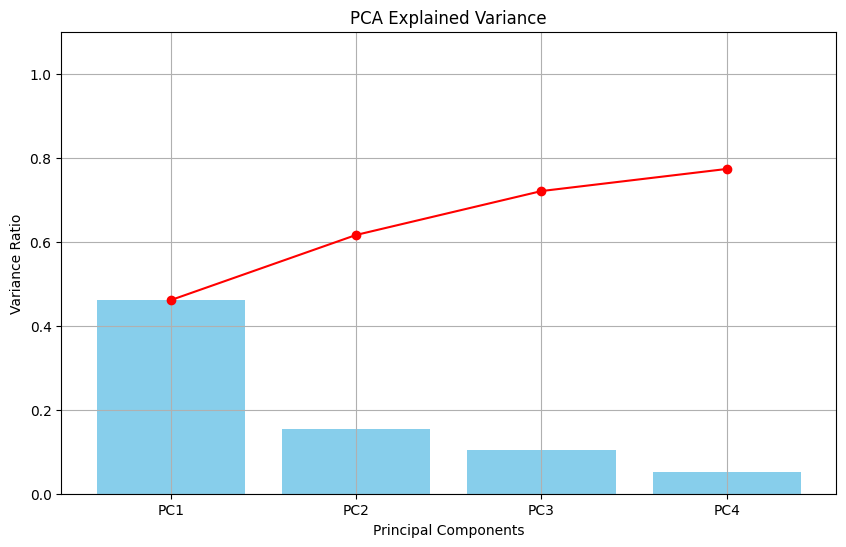

  Principal Component  Explained Variance Ratio  Cumulative Explained Variance
0                 PC1                  0.460886                       0.460886
1                 PC2                  0.155199                       0.616085
2                 PC3                  0.104550                       0.720635
3                 PC4                  0.052687                       0.773322


In [10]:
# Get the explained variance ratios
explained_variance_ratios_1 = pca_1.explained_variance_ratio_

# Create a DataFrame for the explained variance ratios
explained_variance_1_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2', 'PC3', 'PC4'],
    'Explained Variance Ratio': explained_variance_ratios_1
})

# Calculate cumulative explained variance
explained_variance_1_df['Cumulative Explained Variance'] = explained_variance_1_df['Explained Variance Ratio'].cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(explained_variance_1_df['Principal Component'], explained_variance_1_df['Explained Variance Ratio'], color='skyblue')
plt.plot(explained_variance_1_df['Principal Component'], explained_variance_1_df['Cumulative Explained Variance'], marker='o', color='red')
plt.title('PCA Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

# Display the explained variance DataFrame
print(explained_variance_1_df)
